In [18]:
!pip install catboost

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/BhavanishDhamnaskar/transf_d/main/synthetic_financial_data.csv')
data.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [22]:
# Unique values of certain columns
display(data['card_type'].value_counts())
display(data['location'].value_counts())
display(data['purchase_category'].value_counts())
display(data['transaction_description'].value_counts())

Discover            2633
American Express    2494
Visa                2490
MasterCard          2383
Name: card_type, dtype: int64

City-7     223
City-40    221
City-41    218
City-14    218
City-32    218
City-24    217
City-20    215
City-22    213
City-4     213
City-45    211
City-43    210
City-5     210
City-13    209
City-39    209
City-12    209
City-23    209
City-37    209
City-25    207
City-28    207
City-42    206
City-47    206
City-17    205
City-48    202
City-50    202
City-49    202
City-19    201
City-9     200
City-11    199
City-29    197
City-46    196
City-33    196
City-3     195
City-10    194
City-18    194
City-26    192
City-30    191
City-21    191
City-27    191
City-38    191
City-34    191
City-6     190
City-44    189
City-1     188
City-8     188
City-16    186
City-2     185
City-15    184
City-31    177
City-36    167
City-35    158
Name: location, dtype: int64

Travel             1694
Groceries          1692
Gas Station        1666
Retail             1661
Online Shopping    1651
Restaurant         1636
Name: purchase_category, dtype: int64

Purchase at Merchant-2016    120
Purchase at Merchant-2078    120
Purchase at Merchant-2055    118
Purchase at Merchant-2013    117
Purchase at Merchant-2057    117
                            ... 
Purchase at Merchant-2033     82
Purchase at Merchant-2045     82
Purchase at Merchant-2031     80
Purchase at Merchant-2070     75
Purchase at Merchant-2100     75
Name: transaction_description, Length: 100, dtype: int64

# EDA

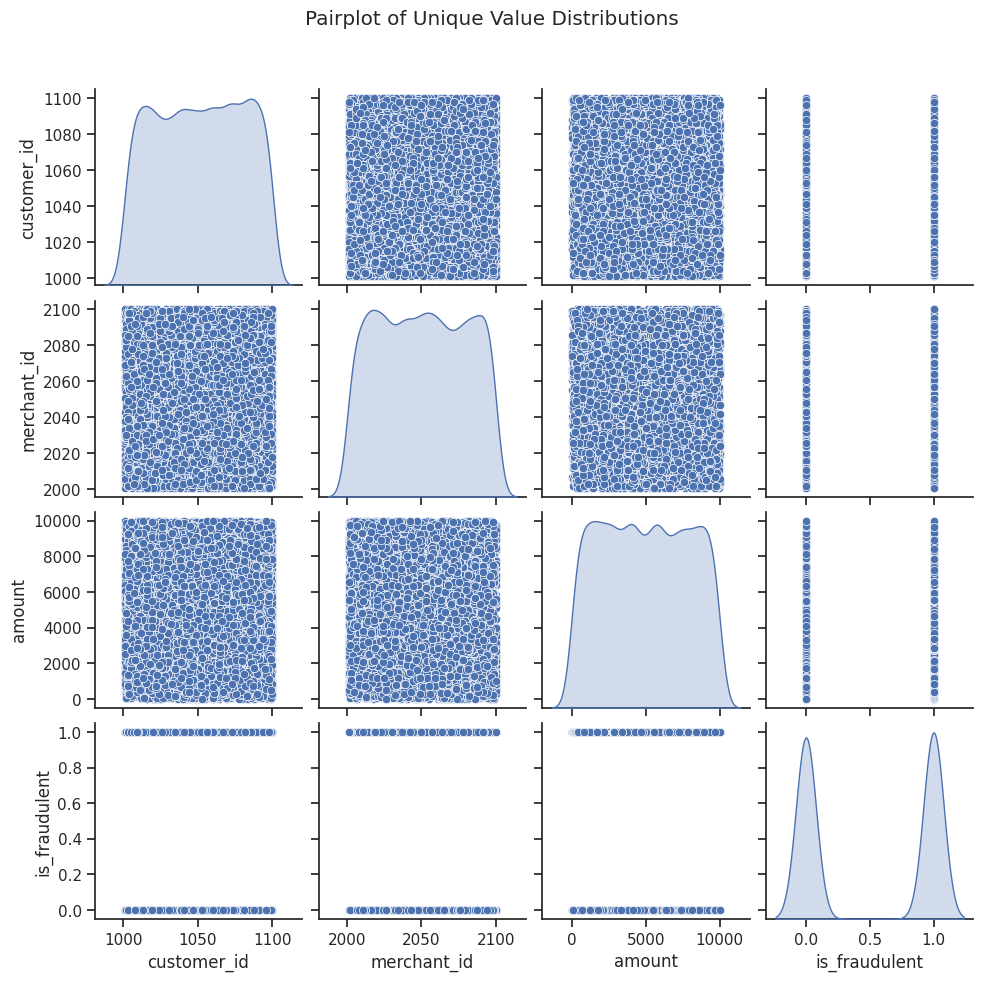

In [23]:
sns.set(style="ticks")
sns.pairplot(data.iloc[:, [1,2,3,4,5,7]], markers="o", diag_kind="kde")

# Adjust the plot layout
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot of Unique Value Distributions")

# Show the plot
plt.show()

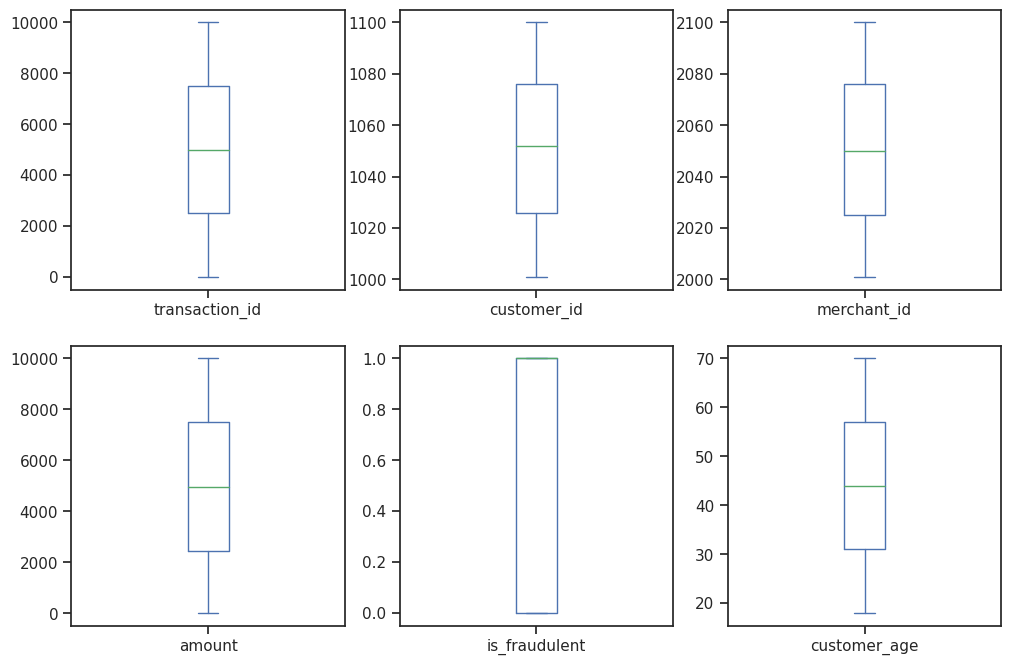

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

data.plot(kind='box', subplots=True, sharex=False, sharey=False, ax=axes)

plt.show()

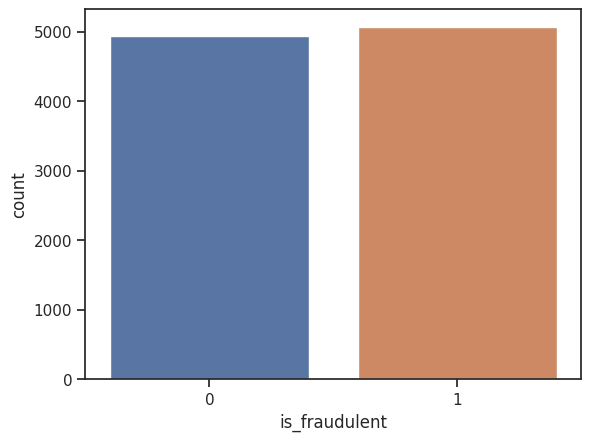

In [25]:
sns.countplot(data=data,x='is_fraudulent')
plt.show()

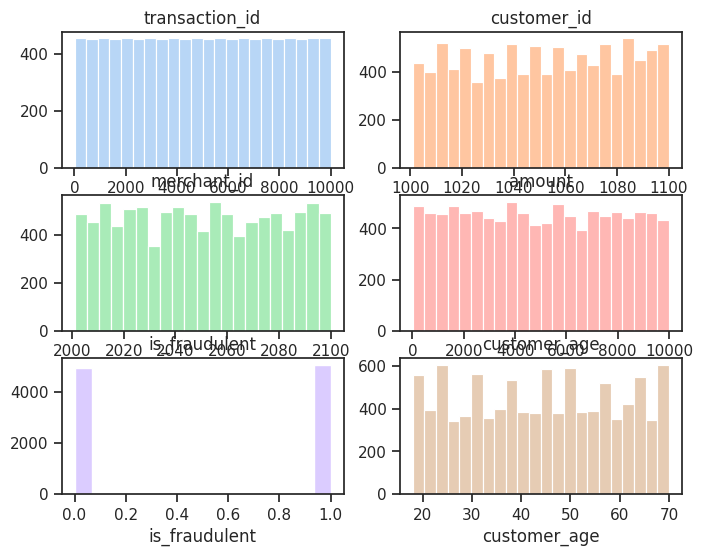

In [26]:
numeric_columns = [col for col in data.columns if data[col].dtype in ['int64','float64']]

fig, axes = plt.subplots(3,2, figsize=(8,6))
colors = sns.color_palette('pastel', len(numeric_columns))

for col, ax, color in zip(numeric_columns, axes.flatten(), colors):
    sns.histplot(data[col], ax=ax, color=color)
    ax.set_ylabel('')
    ax.set_title(col)
    ax.grid(False)

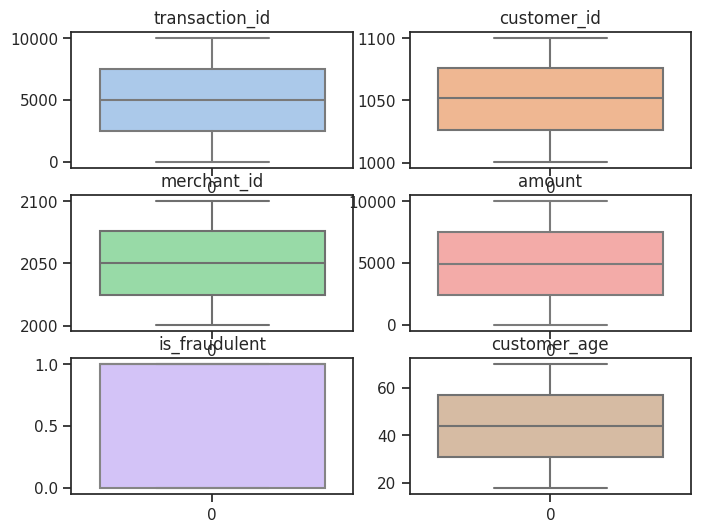

In [27]:
## outlier detection
fig, axes = plt.subplots(3,2, figsize=(8,6))
colors = sns.color_palette('pastel', len(numeric_columns))

for col, ax, color in zip(numeric_columns, axes.flatten(), colors):
    sns.boxplot(data[col], ax=ax, color=color)
    ax.set_ylabel('')
    ax.set_title(col)
    ax.grid(False)

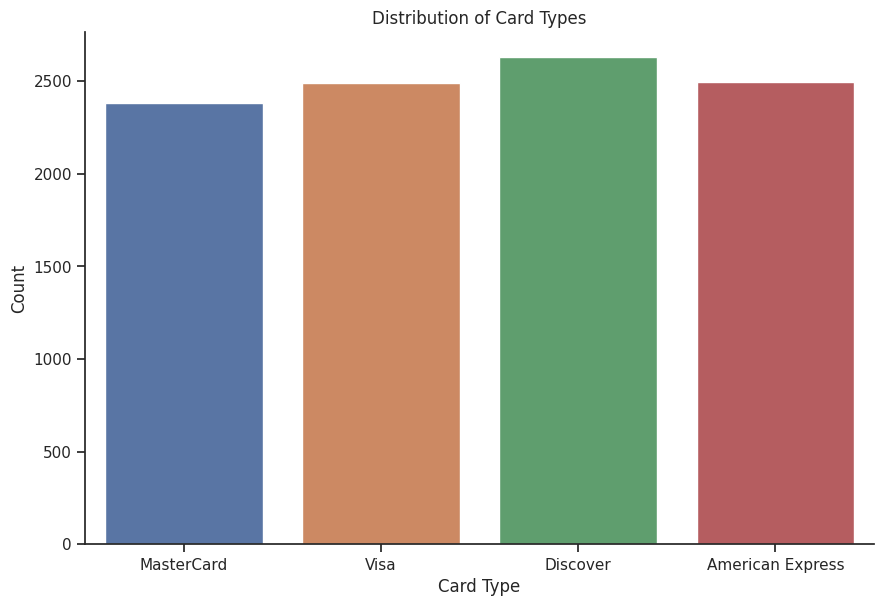

In [28]:
sns.catplot(data=data, x='card_type', kind='count', height=6, aspect=1.5)
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Distribution of Card Types')
plt.show()

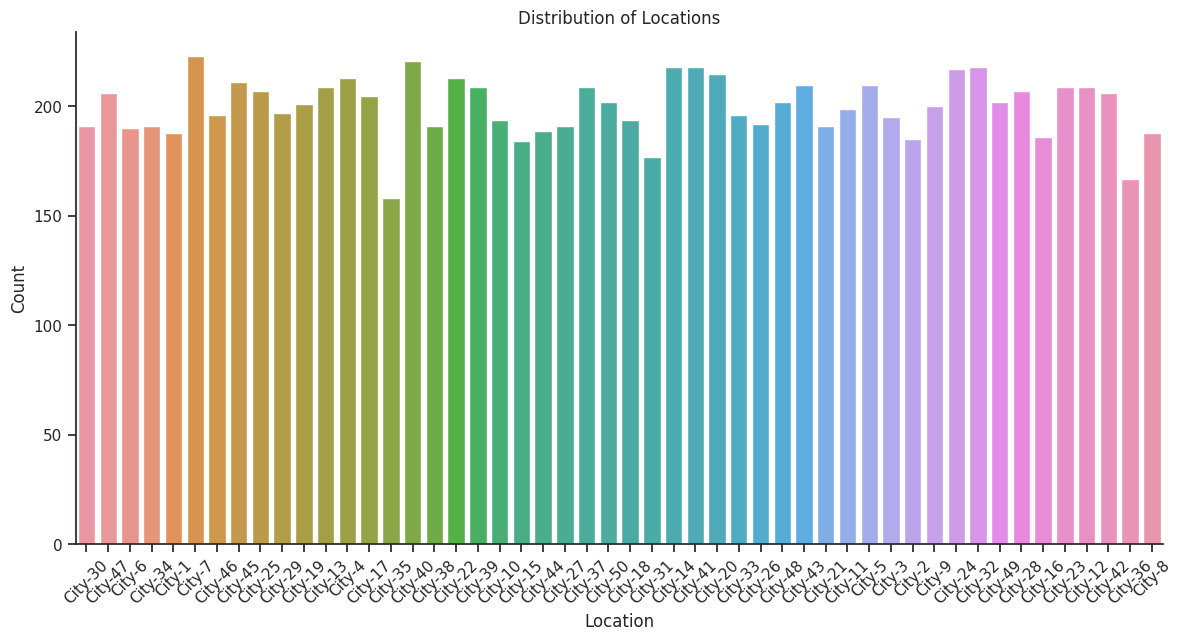

In [29]:
# Categorical plot for 'location'
sns.catplot(data=data, x='location', kind='count', height=6, aspect=2)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Locations')
plt.xticks(rotation=45)
plt.show()

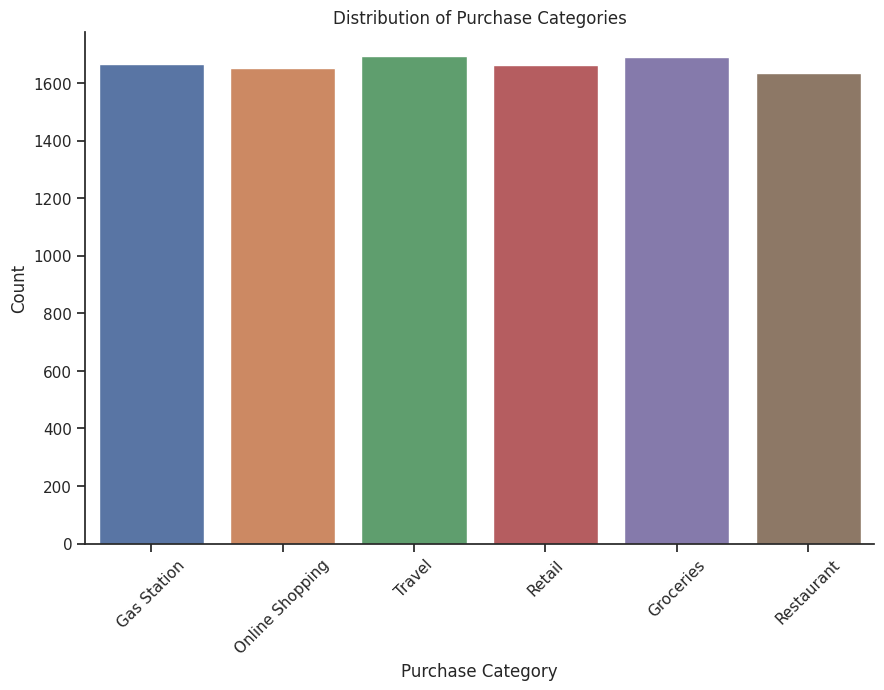

In [30]:
# Categorical plot for 'purchase_category'
sns.catplot(data=data, x='purchase_category', kind='count', height=6, aspect=1.5)
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.title('Distribution of Purchase Categories')
plt.xticks(rotation=45)
plt.show()

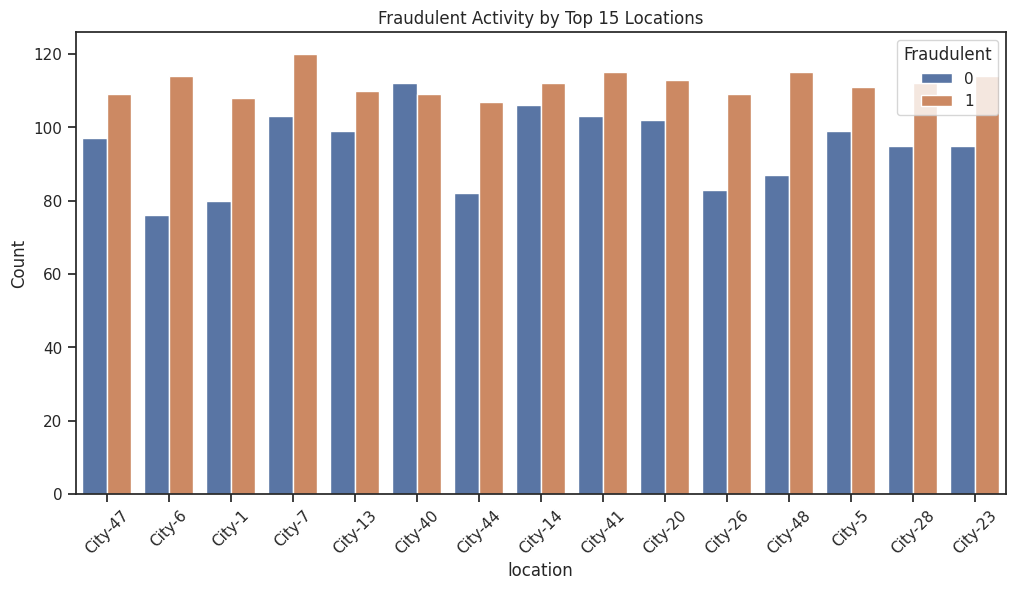

In [31]:
top_15_locations = data[data['is_fraudulent'] == 1]['location'].value_counts().nlargest(15).index.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
sns.countplot(data=data[data['location'].isin(top_15_locations)], x='location', hue='is_fraudulent')
plt.xlabel('location')
plt.ylabel('Count')
plt.title('Fraudulent Activity by Top 15 Locations')
plt.legend(title='Fraudulent', loc='upper right')
plt.xticks(rotation=45)
plt.show()

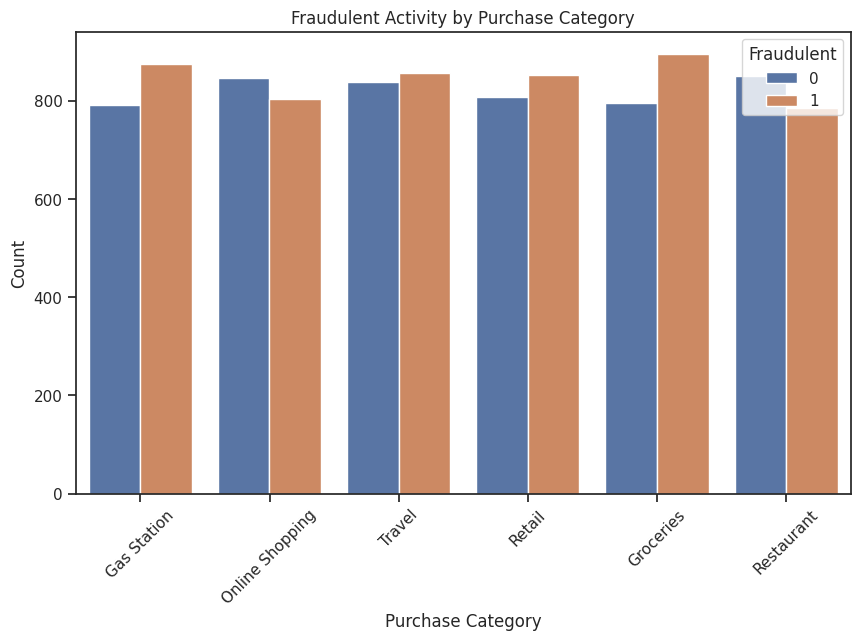

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='purchase_category', hue='is_fraudulent')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.title('Fraudulent Activity by Purchase Category')
plt.legend(title='Fraudulent', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [33]:
#Drop data column
cols = ['transaction_time','card_type','location','purchase_category','transaction_description']

data = data.drop(cols, axis=1)

data.head()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
0,1,1082,2027,5758.59,0,43
1,2,1015,2053,1901.56,1,61
2,3,1004,2035,1248.86,1,57
3,4,1095,2037,7619.05,1,59
4,5,1036,2083,1890.10,1,36


In [34]:
#Finding NULL and Duplicate value
data.isnull().sum()

transaction_id    0
customer_id       0
merchant_id       0
amount            0
is_fraudulent     0
customer_age      0
dtype: int64

In [35]:
data.duplicated().sum()

0

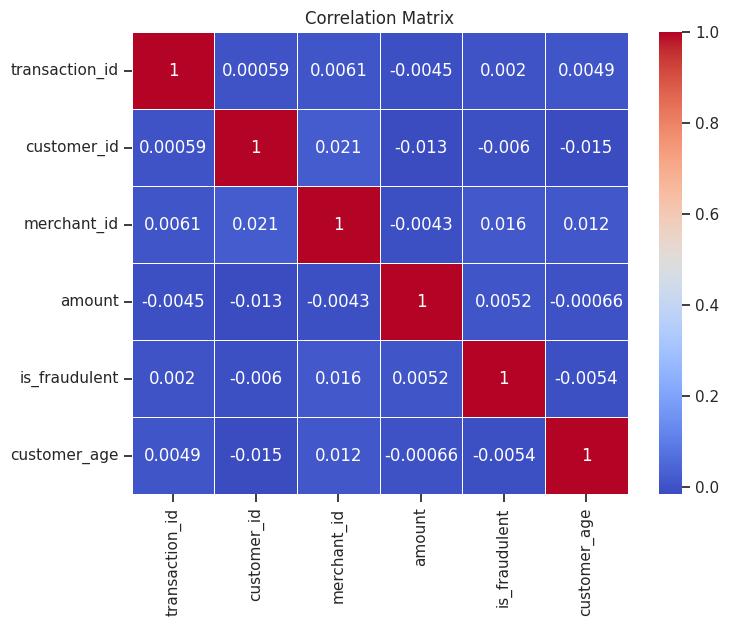

In [36]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

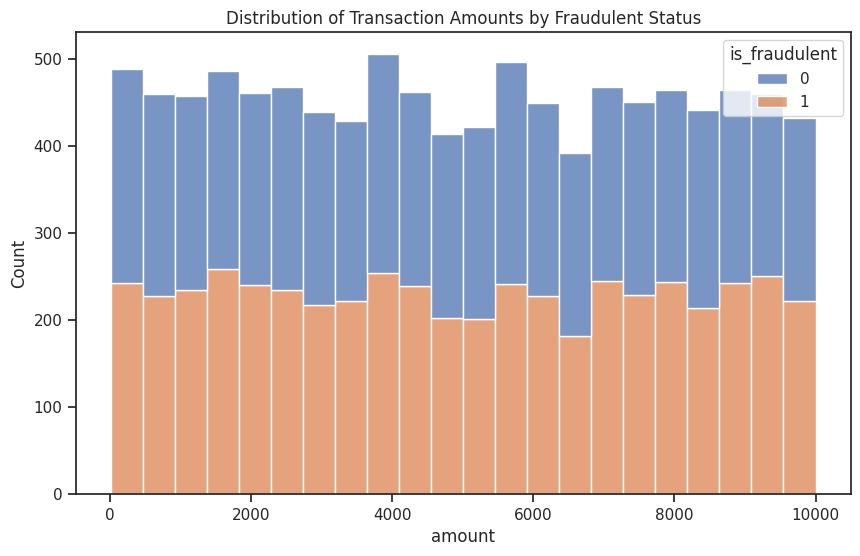

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(data, x='amount', hue='is_fraudulent', multiple="stack")
plt.title('Distribution of Transaction Amounts by Fraudulent Status')
plt.show()

In [38]:
#Assigning x and y
X = data.drop(['is_fraudulent'], axis=1)
y = data['is_fraudulent']

In [39]:
y.value_counts()

1    5068
0    4932
Name: is_fraudulent, dtype: int64

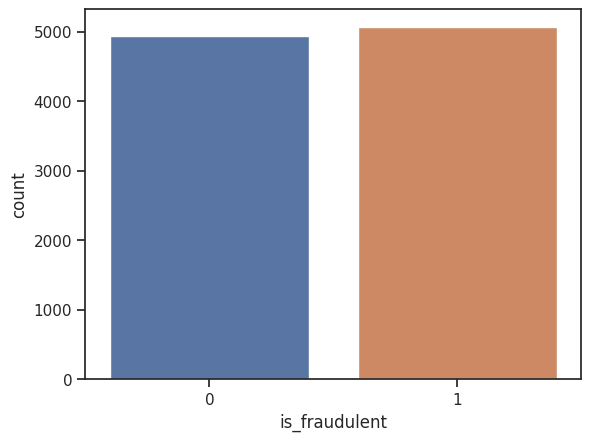

In [40]:
sns.countplot(data=data,x=y)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Scalar Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print the accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38       966
           1       0.52      0.71      0.60      1034

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.51      0.52      0.49      2000

Confusion Matrix:
 [[294 672]
 [297 737]]


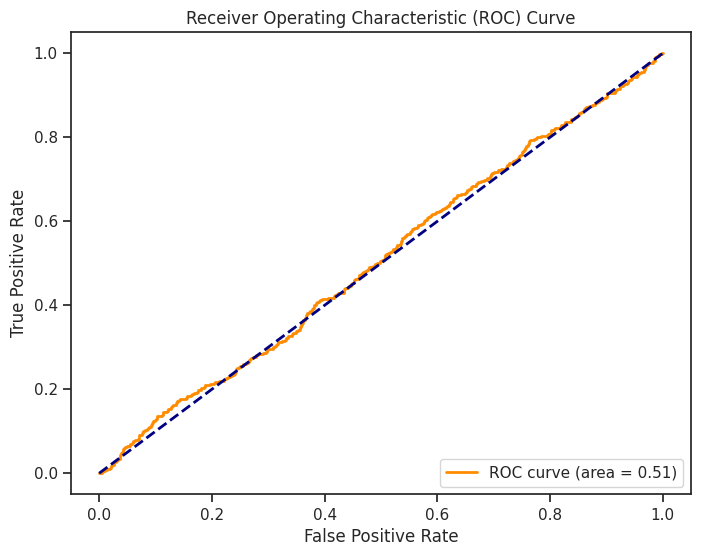

In [44]:
from sklearn.metrics import roc_curve, auc

y_scores = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print the accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.34      0.41       966
           1       0.52      0.68      0.59      1034

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.52      0.50      2000

Confusion Matrix:
 [[332 634]
 [334 700]]


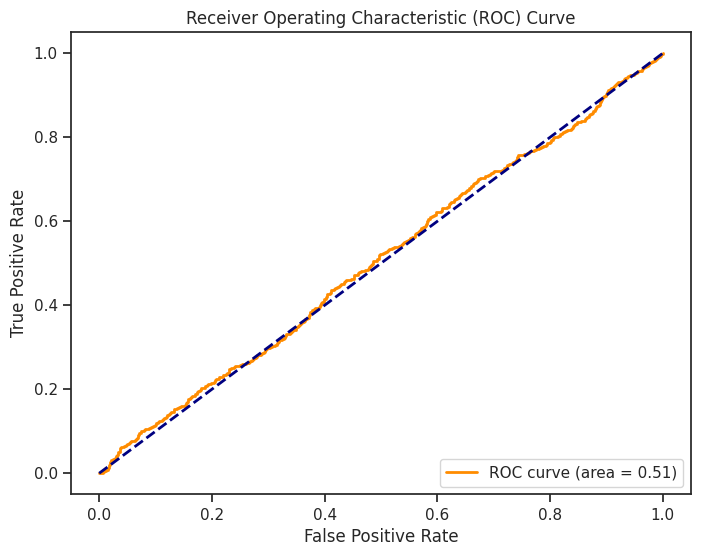

In [46]:
from sklearn.metrics import roc_curve, auc

y_scores = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.10      0.17       966
           1       0.51      0.88      0.65      1034

    accuracy                           0.51      2000
   macro avg       0.48      0.49      0.41      2000
weighted avg       0.49      0.51      0.42      2000


Confusion Matrix:
 [[101 865]
 [121 913]]


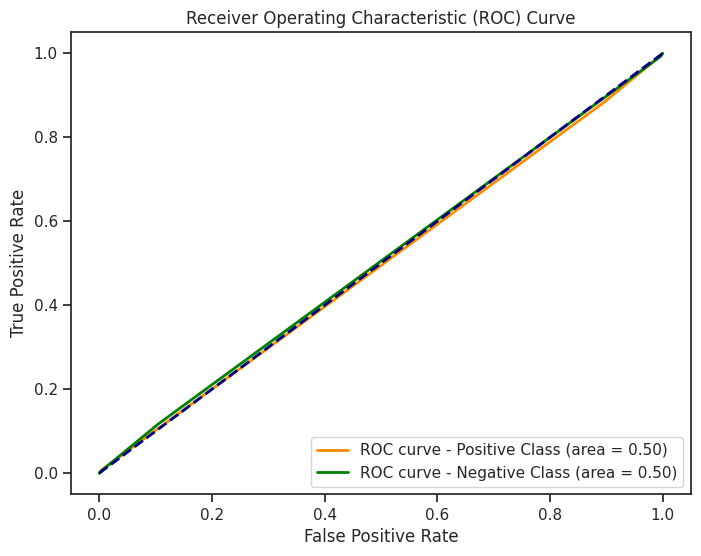

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for both classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, y_pred_prob[:, 0])
roc_auc_neg = roc_auc_score(y_test, y_pred_prob[:, 0])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48       966
           1       0.51      0.50      0.50      1034

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000


Confusion Matrix:
 [[463 503]
 [517 517]]


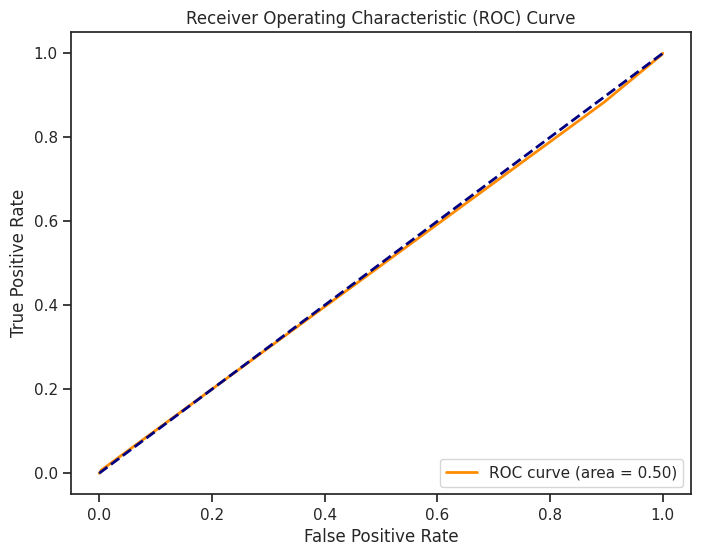

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# XGBOOST

In [51]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48       966
           1       0.51      0.50      0.50      1034

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000


Confusion Matrix:
 [[466 500]
 [519 515]]


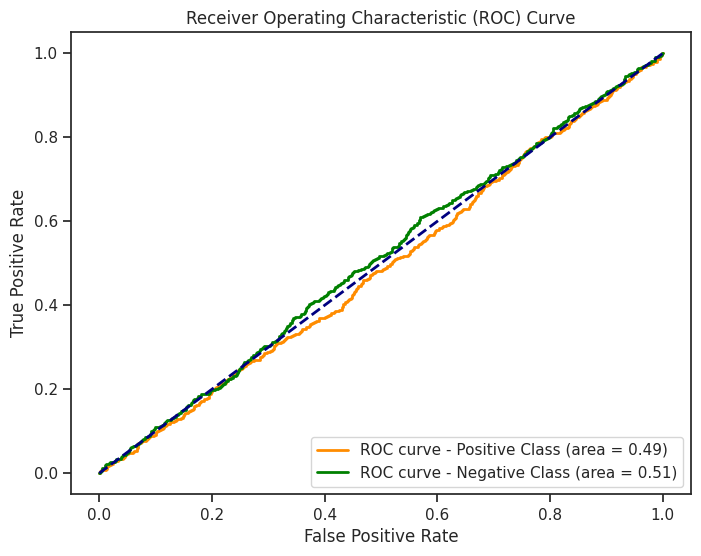

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for both classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, y_pred_prob[:, 0])
roc_auc_neg = roc_auc_score(y_test, y_pred_prob[:, 0])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine

In [53]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.48

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.40      0.43       966
           1       0.50      0.55      0.52      1034

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000


Confusion Matrix:
 [[389 577]
 [463 571]]


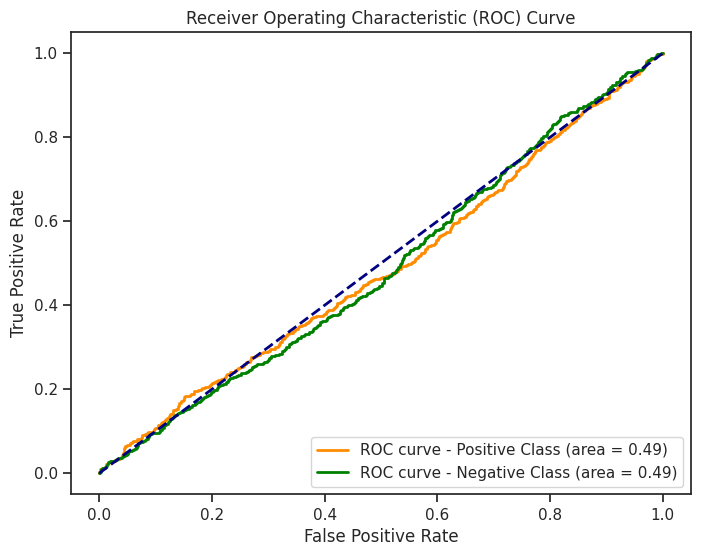

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute decision function
y_score = model.decision_function(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Invert the labels for the ROC curve of the negative class
y_test_negative = 1 - y_test  # Assuming the negative class is labeled as 0

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, _ = roc_curve(y_test_negative, -y_score)
roc_auc_neg = roc_auc_score(y_test_negative, -y_score)

# Plot ROC curves for both positive and negative classes
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Accuracy from all Model

Accuracy for Logistic Regression: 0.52
Accuracy for Gaussian Naive Bayes: 0.52
Accuracy for Decision Tree: 0.53
Accuracy for Random Forest: 0.50
Accuracy for Support Vector Machine: 0.48
Accuracy for XGBoost: 0.49


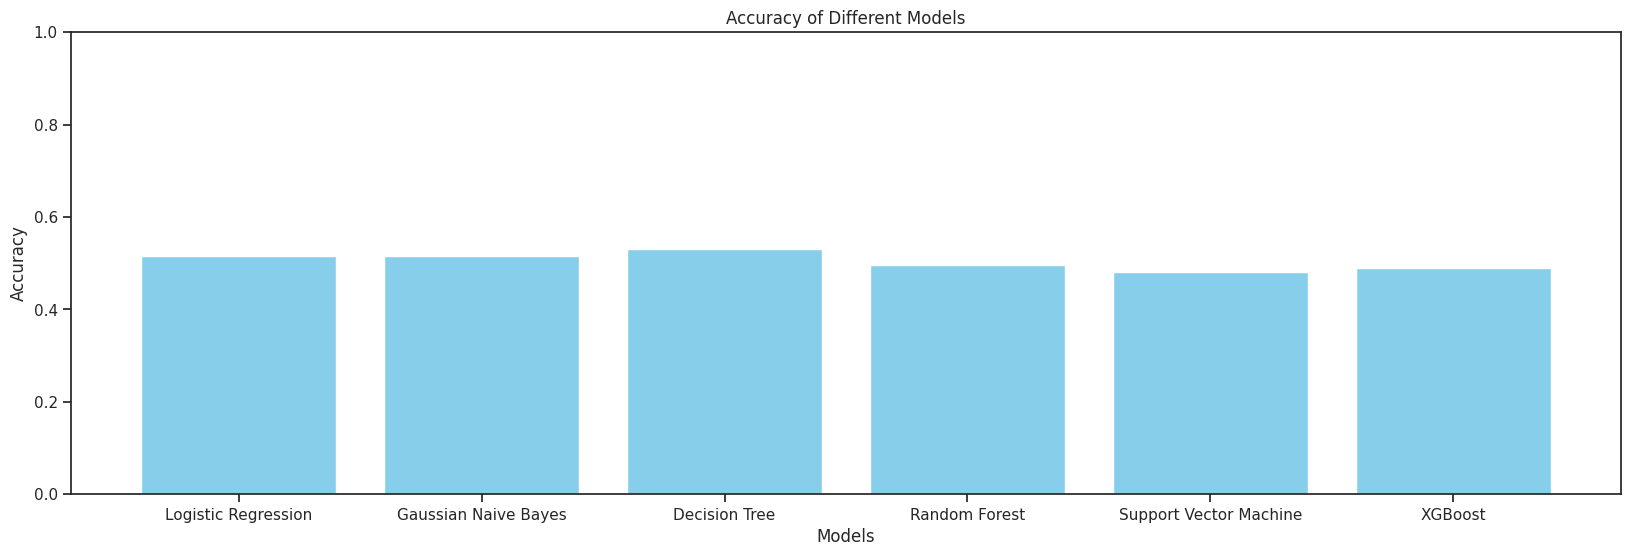

In [55]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' :  RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'XGBoost' : XGBClassifier()
}

accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

# Create a bar plot for the accuracies
plt.figure(figsize=(20, 6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])
plt.show()